https://pub.towardsai.net/3-best-often-better-alternatives-to-histograms-b588f3850ce8

In [4]:
x = [4, 6, 5, 6, 4, 3, 2]
# import the function
#!pip install empiricaldist
from empiricaldist import Pmf  # pip install empiricaldist

# Compute PMF
pmf_dist = Pmf.from_seq(x, normalize=False)
pmf_dist

  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
    Preparing wheel metadata: started
    Preparing wheel metadata: finished with status 'done'
  Created wheel for empiricaldist: filename=empiricaldist-0.6.8-py3-none-any.whl size=12121 sha256=0037770a618b9226a97ab5ce0e6f78804648a810ebc316a5cb1b8cba4967e685
  Stored in directory: c:\users\biegertm\appdata\local\pip\cache\wheels\c2\2f\73\700abc644ee5aba92a8b40552794103c445cd47fcdfe7828f7
Successfully built empiricaldist


,probs
2,1
3,1
4,2
5,1
6,2


In [5]:
pmf_dist_norm = Pmf.from_seq(x, normalize=True)
print(pmf_dist_norm)

2    0.142857
3    0.142857
4    0.285714
5    0.142857
6    0.285714
Name: , dtype: float64


In [9]:
import pandas as pd
marks = pd.read_csv('StudentsPerformance.csv')
marks.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [10]:
marks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [11]:
math_pmf = Pmf.from_seq(marks['math score'])
math_pmf.head()

,probs
0,0.001
8,0.001
18,0.001


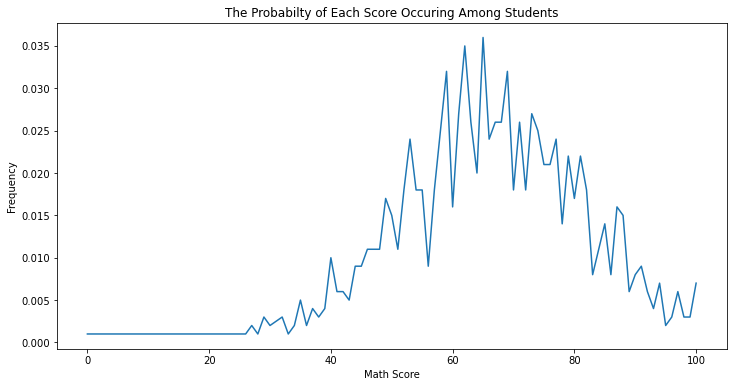

In [13]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(12,6))

math_pmf.plot()

ax.set(xlabel='Math Score',
       ylabel='Frequency',
       title='The Probabilty of Each Score Occuring Among Students');

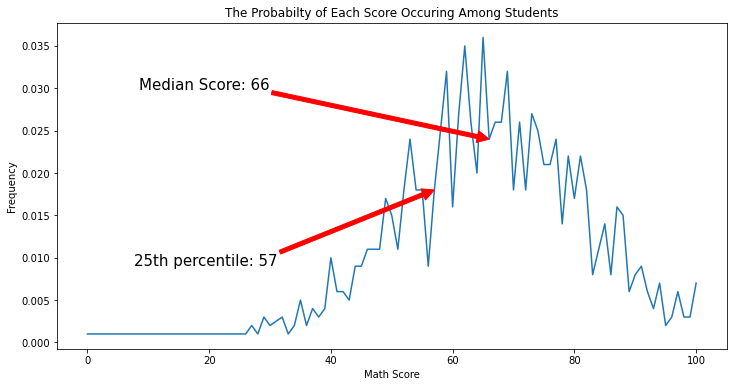

In [14]:
# Find median
median_score = marks['math score'].median()
# Extract its prob
median_prob = math_pmf[median_score]
# Find 25th percentile
percentile_25th = marks['math score'].describe()['25%']
# Extract its prob
percentile_prob = math_pmf[percentile_25th]

# Recreate the plot with annotations
fig, ax = plt.subplots(figsize=(12,6))
# Plot the PMF
math_pmf.plot()
# Labelling
ax.set(xlabel='Math Score',
       ylabel='Frequency',
       title='The Probabilty of Each Score Occuring Among Students')

# Annotate the median score
ax.annotate(text=f'Median Score: {int(median_score)}',
            xy=(median_score, median_prob),
            xycoords='data',
            fontsize=15,
            xytext=(-350, 50),
            textcoords='offset points', 
            arrowprops={'color': 'red'})

# Annotate the 25th percentile
ax.annotate(text=f'25th percentile: {int(percentile_25th)}',
            xy=(percentile_25th, percentile_prob),
            xycoords='data',
            fontsize=15,
            xytext=(-300, -75),
            textcoords='offset points', 
            arrowprops={'color': 'red'});

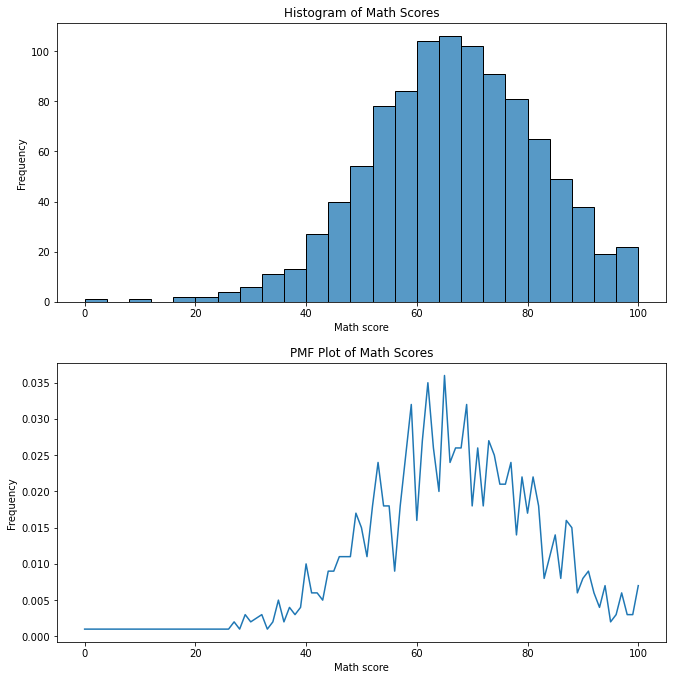

In [16]:
import seaborn as sns
# Create axes
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10),)
# Set a padding
fig.tight_layout(pad=4)
# PLot a histogram of marks
sns.histplot(marks['math score'], bins=25, ax=ax1)  # Binning bias, takes a while to get the right bin numbers
ax1.set(xlabel='Math score',
        ylabel='Frequency',
        title='Histogram of Math Scores')
ax2.plot(math_pmf)
ax2.set(xlabel='Math score',
        ylabel='Frequency',
        title='PMF Plot of Math Scores');

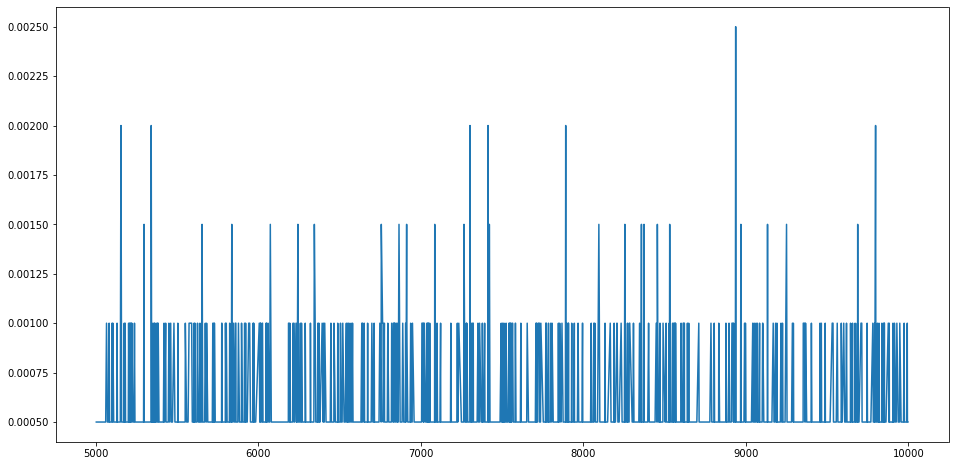

In [18]:
import numpy as np
# Create 2000 random integers
numbers = np.random.randint(5000, 10000, size=2000)

# Plot the numbers
fig, ax = plt.subplots(figsize=(16, 8))

ax.plot(Pmf.from_seq(numbers))

plt.show();

In [19]:
# Simple dist
dist = [1, 2, 3, 4, 5, 6, 7]

from empiricaldist import Cdf

# Create the distribution
cdf_dist = Cdf.from_seq(dist)
cdf_dist

,probs
1,0.142857
2,0.285714
3,0.428571
4,0.571429
5,0.714286
6,0.857143
7,1.000000


In [20]:
# load data
diamonds = sns.load_dataset('diamonds')
diamonds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53940 non-null  float64 
 1   cut      53940 non-null  category
 2   color    53940 non-null  category
 3   clarity  53940 non-null  category
 4   depth    53940 non-null  float64 
 5   table    53940 non-null  float64 
 6   price    53940 non-null  int64   
 7   x        53940 non-null  float64 
 8   y        53940 non-null  float64 
 9   z        53940 non-null  float64 
dtypes: category(3), float64(6), int64(1)
memory usage: 3.0 MB


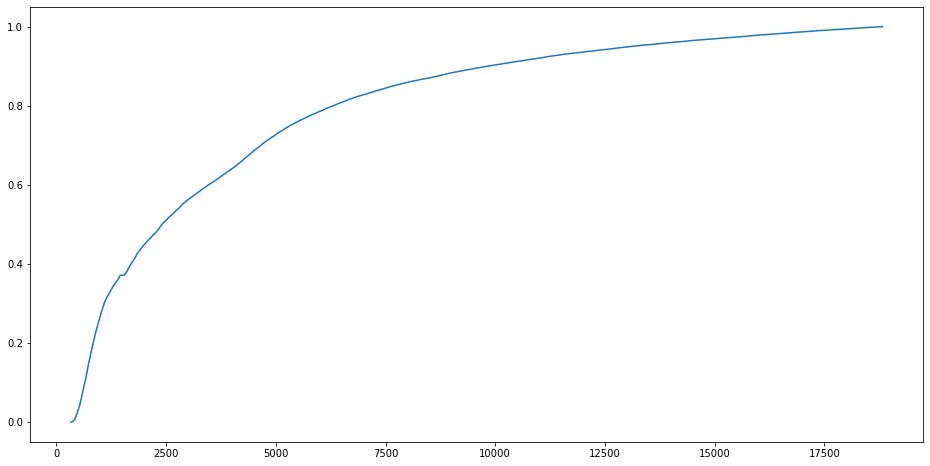

In [21]:
# Create the CDF
cdf_prices = Cdf.from_seq(diamonds['price'])

# Plot the CDF
fig, ax = plt.subplots(figsize=(16, 8))
ax.plot(cdf_prices)
plt.show();

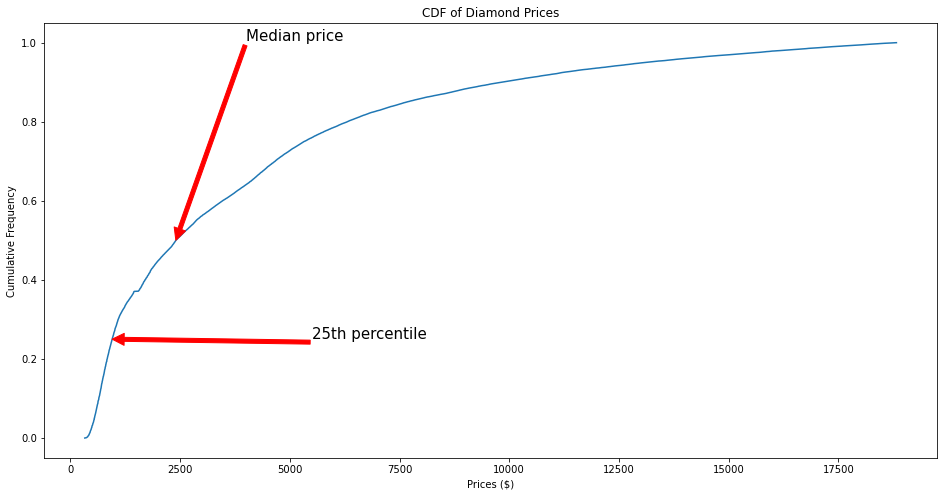

In [22]:
# Calculate the median price
median_price = diamonds['price'].median()

# Get the frequency for median
median_prob = cdf_prices[median_price]

# 25th percentile
percentile_25th = diamonds['price'].describe()['25%']

# Probability of 25th percentile
percentile_prob = cdf_prices[percentile_25th]


fig, ax = plt.subplots(figsize=(16,8))

# PLot the CDF
ax.plot(cdf_prices)

# Annotate median price
ax.annotate(text='Median price',
            xy=(median_price, median_prob),
            xycoords='data',
            textcoords='offset points',
            xytext=(70, 200),
            fontsize=15,
            arrowprops={'color': 'red'})

# Annotate 25th percentile
ax.annotate(text='25th percentile',
            xy=(percentile_25th, percentile_prob),
            xycoords='data',
            textcoords='offset points',
            xytext=(200, 0),
            fontsize=15,
            arrowprops={'color': 'red'})

ax.set(title='CDF of Diamond Prices',
       xlabel='Prices ($)',
       ylabel='Cumulative Frequency')
plt.show();

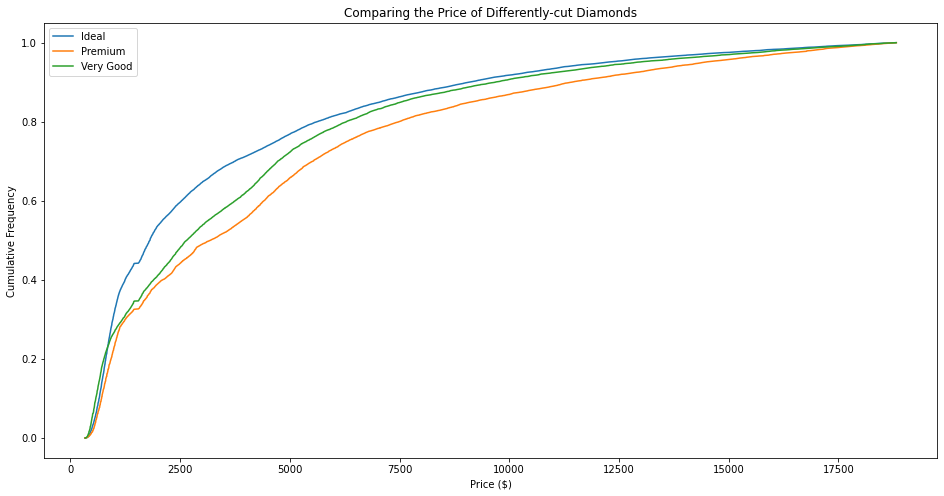

In [23]:
# Ideal cuts
ideal = diamonds['cut'] == 'Ideal'
ideal_cdf = Cdf.from_seq(diamonds[ideal]['price'])

# Premium cuts
premium = diamonds['cut'] == 'Premium'
premium_cdf = Cdf.from_seq(diamonds[premium]['price'])

# Very good cuts
very_good = diamonds['cut'] == 'Very Good'
very_good_cdf = Cdf.from_seq(diamonds[very_good]['price'])

fig, ax = plt.subplots(figsize=(16,8))
# Plot the ideal diamonds
ax.plot(ideal_cdf)
# Plot the premium diamonds
ax.plot(premium_cdf)
# Plot the very good diamonds
ax.plot(very_good_cdf)

ax.set(title='Comparing the Price of Differently-cut Diamonds',
       xlabel='Price ($)',
       ylabel='Cumulative Frequency')
plt.legend(['Ideal', 'Premium', 'Very Good'])
plt.show();

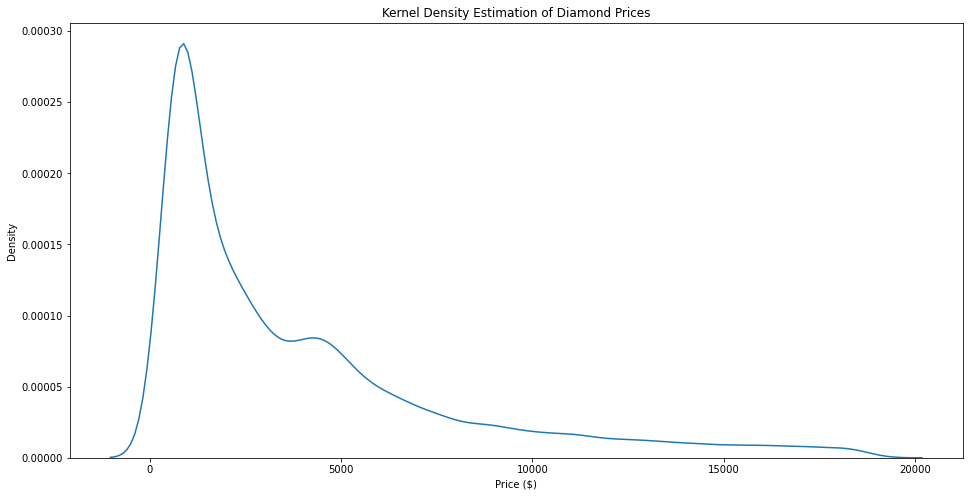

In [24]:
fig, ax = plt.subplots(figsize=(16, 8))

sns.kdeplot(diamonds['price'])

ax.set(title='Kernel Density Estimation of Diamond Prices',
       xlabel='Price ($)');

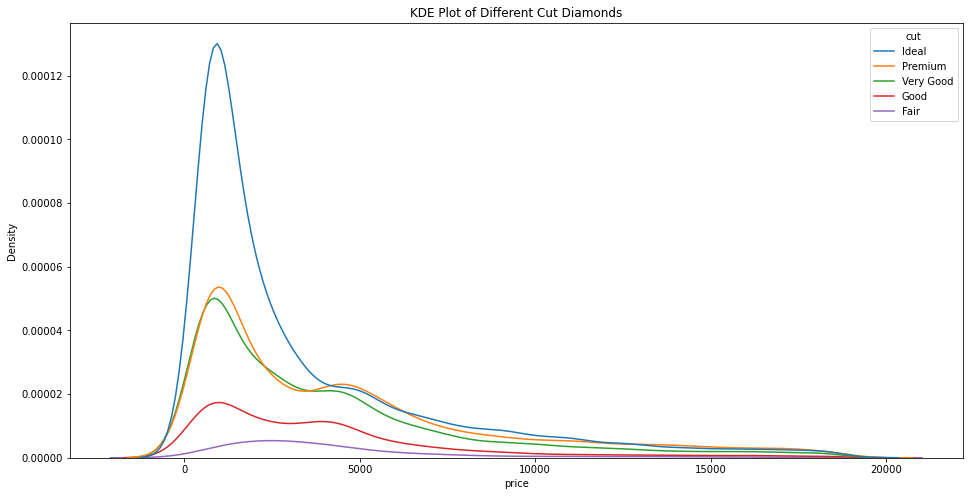

In [25]:
fig, ax = plt.subplots(figsize=(16, 8))
sns.kdeplot(x='price', hue='cut', data=diamonds)
ax.set(title='KDE Plot of Different Cut Diamonds')
plt.show();